In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree

import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import pprint

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc, mean_squared_error
import matplotlib.pyplot as plt


%matplotlib inline


In [24]:
# Reading in emissions data
df = pd.read_csv('processed.csv')

In [14]:
# Set Pandas to display more columns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)

# Display the first few rows of the DataFrame
print(df.head())

# Display data types of each column
print(df.dtypes)

          Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3                 Oats              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  \
0                                                NaN          
1                                                NaN          
2                                                NaN       

# Dropping units and making numeric

In [19]:
import pandas as pd

# Read the data
data = pd.read_csv("processed.csv")

# Function to remove units and convert to numeric
def preprocess_column(column):
    if data[column].dtype == object and column not in ["Food product", "Matched_food_product"]:
        # Remove non-numeric characters and convert to float
        return pd.to_numeric(data[column].str.replace('[^\d.]', '', regex=True), errors='coerce')
    else:
        # Return the column as-is if it's already numeric or if it's 'Food product' or 'Matched_food_product'
        return data[column]

# Apply preprocessing to each column except 'Food product' and 'Matched_food_product'
for column in data.columns:
    data[column] = preprocess_column(column)

# Handling missing values (replacing NaNs with 0.0)
data.fillna(0.0, inplace=True)

# The data is now preprocessed


In [28]:
# Set Pandas to display more columns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Display the first few rows of the DataFrame
print(data.head())

# Display data types of each column
print(data.dtypes)

          Food product  Land use change  Animal Feed    Farm  Processing  \
0  Wheat & Rye (Bread)           0.0001          0.0  0.0008      0.0002   
1         Maize (Meal)           0.0003          0.0  0.0005      0.0001   
2        Barley (Beer)           0.0000          0.0  0.0002      0.0001   
3                 Oats           0.0000          0.0  0.0014      0.0000   
4                 Rice           0.0000          0.0  0.0036      0.0001   

   Transport  Packging  Retail  Total_emissions  \
0     0.0001    0.0001  0.0001           0.0014   
1     0.0001    0.0001  0.0000           0.0011   
2     0.0000    0.0005  0.0003           0.0011   
3     0.0001    0.0001  0.0000           0.0016   
4     0.0001    0.0001  0.0001           0.0040   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  \
0                                           0.000000          
1                                           0.000000          
2                                           0.0

In [21]:
data.to_csv('processed_no_units.csv', index=False)

# Changing to grams

In [40]:
data = pd.read_csv("processed_no_units.csv")

# Convert 'per kg' columns to 'per g' by dividing by 1000
columns_per_kg = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 
                  'Transport', 'Packging', 'Retail', 'Total_emissions', 
                 ]
for col in columns_per_kg:
    data[col] = data[col] / 1000

# Convert 'per 100g' columns to 'per g' by dividing by 100
columns_per_100g = ['calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium', 
                    'choline', 'folate', 'folic_acid', 'niacin', 
                    'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a',
                    'vitamin_a_rae', 'carotene_alpha', 'carotene_beta', 
                    'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 
                    'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 
                    'vitamin_e', 'tocopherol_alpha', 'vitamin_k', 'calcium', 
                    'copper', 'irom', 'magnesium', 'manganese', 'phosphorous', 
                    'potassium', 'selenium', 'zink', 'protein', 'alanine', 
                    'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 
                    'glycine', 'histidine', 'hydroxyproline', 'isoleucine', 
                    'leucine', 'lysine', 'methionine', 'phenylalanine', 
                    'proline', 'serine', 'threonine', 'tryptophan', 'tyrosine', 
                    'valine', 'carbohydrate', 'fiber', 'sugars', 'fructose', 
                    'galactose', 'glucose', 'lactose', 'maltose', 'sucrose', 
                    'fat', 'saturated_fatty_acids', 'monounsaturated_fatty_acids',
                    'polyunsaturated_fatty_acids', 'fatty_acids_total_trans', 
                    'alcohol', 'ash', 'caffeine', 'theobromine', 'water',
                   ]
for col in columns_per_100g:
    data[col] = data[col] / 100

In [41]:
data.to_csv('processed_no_units_gram.csv', index=False)

# Some EDA 

In [42]:
data = pd.read_csv("processed_no_units.csv")

# Define the key nutrients (You may need to adjust this list based on your dataset)
nutrients = ['protein', 'fiber', 'calcium', 'irom', 'magnesium', 'potassium', 'vitamin_c']

# Calculate nutrient density scores
# Note: Ensure that 'calories' is already in the correct unit (per g) in your dataset
data['nutrient_density'] = data[nutrients].sum(axis=1) / data['calories']

# Rank foods based on nutrient density
ranked_foods = data.sort_values(by='nutrient_density', ascending=False)

# Display top 10 most nutrient-dense foods
print(ranked_foods[['Food product', 'nutrient_density']].head(10))


      Food product  nutrient_density
31          Coffee         28.160000
20        Tomatoes         15.220625
23         Cabbage         10.753333
30           Melon          9.607353
22         Turnips          9.142857
5         Potatoes          8.374310
27          Apples          7.198800
13         Soymilk          6.480976
38            Milk          5.951639
21  Onions & Leeks          5.317931


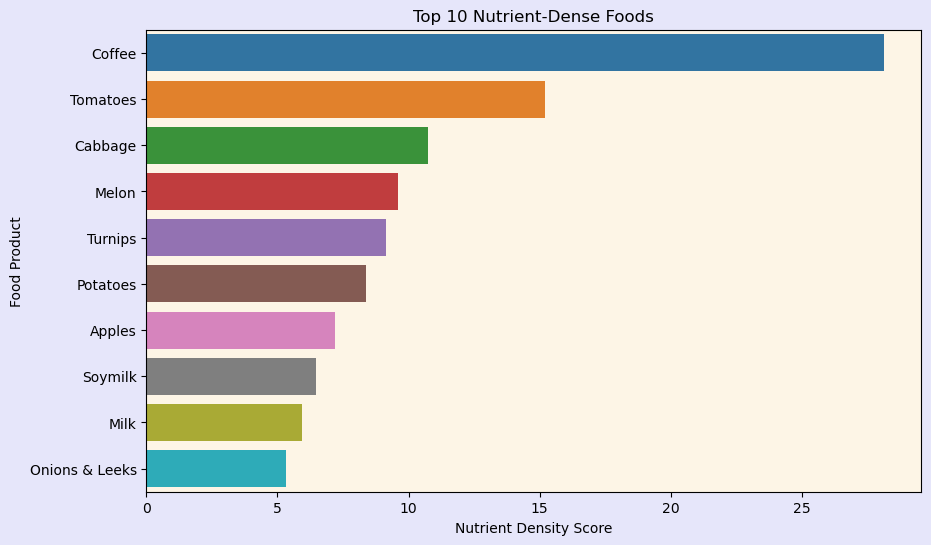

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("processed_no_units.csv")

# Calculate nutrient density (as before)
nutrients = ['protein', 'fiber', 'calcium', 'irom', 'magnesium', 'potassium', 'vitamin_c']
data['nutrient_density'] = data[nutrients].sum(axis=1) / data['calories']

# Sort and select top 10 foods
top_foods = data.sort_values(by='nutrient_density', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='nutrient_density', y='Food product', data=top_foods)
plt.title('Top 10 Nutrient-Dense Foods')
plt.xlabel('Nutrient Density Score')
plt.ylabel('Food Product')
plt.show()


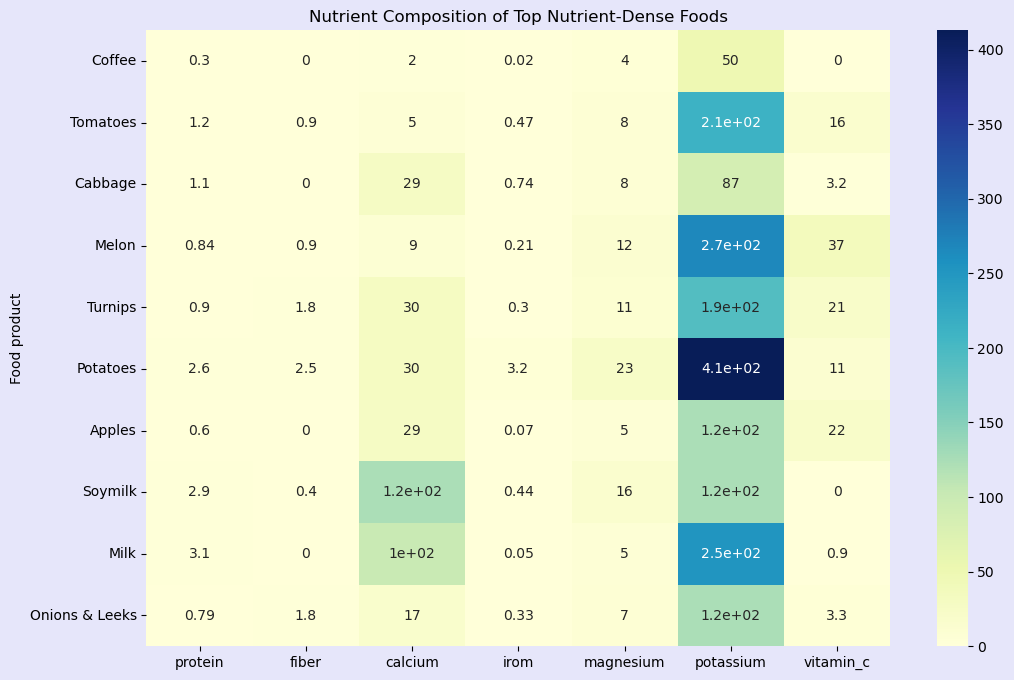

In [44]:
# Select nutrients data for top foods
top_foods_nutrients = top_foods[['Food product'] + nutrients].set_index('Food product')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(top_foods_nutrients, annot=True, cmap="YlGnBu")
plt.title('Nutrient Composition of Top Nutrient-Dense Foods')
plt.show()


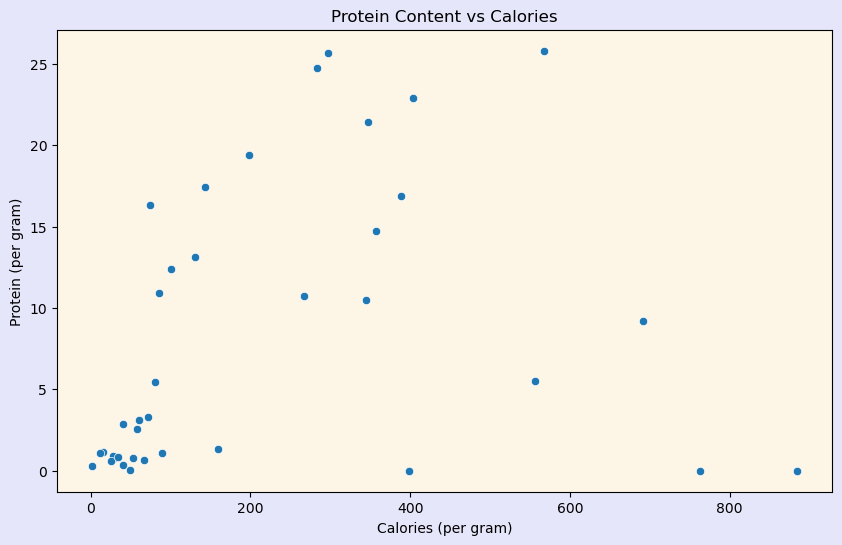

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='protein', data=data)
plt.title('Protein Content vs Calories')
plt.xlabel('Calories (per gram)')
plt.ylabel('Protein (per gram)')
plt.show()


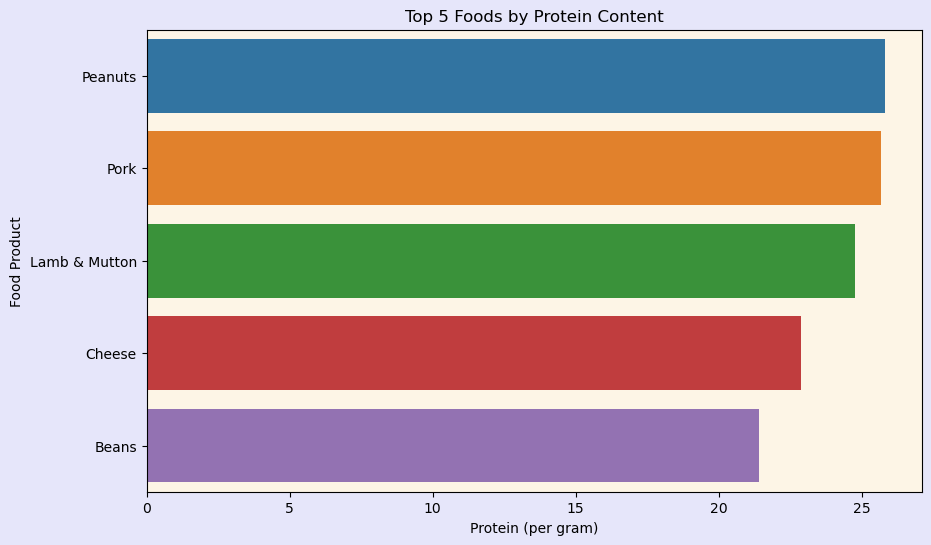

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
data = pd.read_csv("processed_no_units.csv")

# Sort the data by protein content and select the top five
top_protein_foods = data.sort_values(by='protein', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='protein', y='Food product', data=top_protein_foods)
plt.title('Top 5 Foods by Protein Content')
plt.xlabel('Protein (per gram)')
plt.ylabel('Food Product')
plt.show()


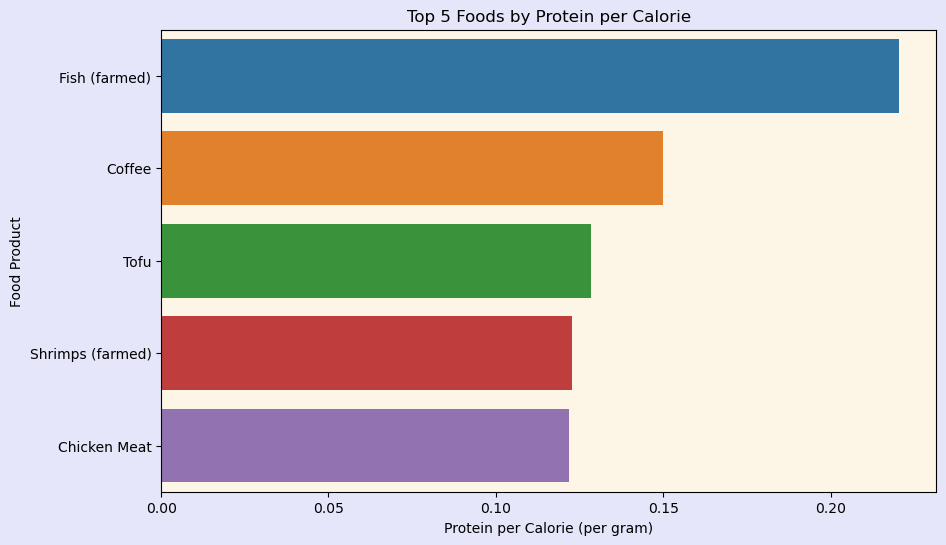

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
data = pd.read_csv("processed_no_units.csv")

# Calculate protein per calorie ratio
data['protein_per_calorie'] = data['protein'] / data['calories']

# Sort the data by protein per calorie ratio and select the top five
top_protein_per_calorie_foods = data.sort_values(by='protein_per_calorie', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='protein_per_calorie', y='Food product', data=top_protein_per_calorie_foods)
plt.title('Top 5 Foods by Protein per Calorie')
plt.xlabel('Protein per Calorie (per gram)')
plt.ylabel('Food Product')
plt.show()
